# Applying Regularization Techniques

In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Breast Cancer Dataset
Load the Breast Cancer dataset from sklearn and perform exploratory data analysis.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

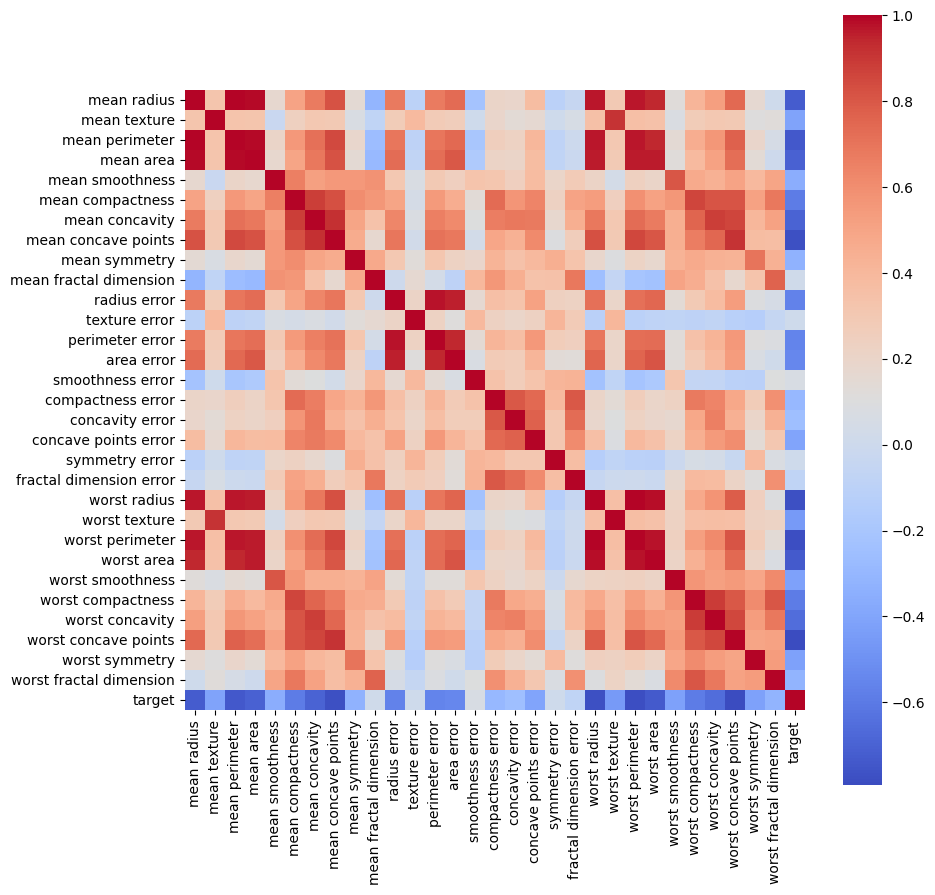

In [23]:
# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the DataFrame
print(df.head())

# Display the shape of the DataFrame
print(f"Dataset shape: {df.shape}")

# Display the distribution of the target variable
print(df['target'].value_counts())

# Display summary statistics
print(df.describe())

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, cmap='coolwarm')
plt.show()

# Data Preprocessing
Preprocess the data by splitting it into training and testing sets, and scaling the features.

In [24]:
# Splitting the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply L1 Regularization (Lasso)
Apply L1 regularization technique (Lasso regression) on the dataset and evaluate the model.

In [37]:
# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Since Lasso regression is a linear model, the output will be continuous and we need to convert it to discrete values
y_pred_lasso = [1 if pred > 0.5 else 0 for pred in y_pred_lasso]

# Print the accuracy score
print(f"Lasso Regression Accuracy: {accuracy_score(y_test, y_pred_lasso)}")

Lasso Regression Accuracy: 0.956140350877193


# Apply L2 Regularization (Ridge)
Apply L2 regularization technique (Ridge regression) on the dataset and evaluate the model.

In [38]:
# Initialize Ridge regression model
ridge = Ridge(alpha=1.0)

# Fit the model
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test_scaled)

# Since Ridge regression is a linear model, the output will be continuous and we need to convert it to discrete values
y_pred_ridge = [1 if pred > 0.5 else 0 for pred in y_pred_ridge]

# Print the accuracy score
print(f"Ridge Regression Accuracy: {accuracy_score(y_test, y_pred_ridge)}")

Ridge Regression Accuracy: 0.956140350877193


# Apply Dropout Regularization
Apply Dropout regularization technique on the dataset and evaluate the model.

In [36]:
# Importing necessary libraries for Dropout regularization
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Dropout Regularization Accuracy: {accuracy}")

# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred_dropout = (y_pred_prob > 0.5).astype(int)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dropout Regularization Accuracy: 0.9824561476707458
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fa8c822ac20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


# Apply ElasticNet Regularization

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's a good practice to scale your data for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ElasticNet instance and fit it
regr = ElasticNet(random_state=0)
regr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_enet = regr.predict(X_test_scaled)

# Calculate the accuracy
enet_accuracy = regr.score(X_test_scaled, y_test)
print(f"ElasticNet Accuracy: {enet_accuracy}")

# You can also calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_enet)
print(f"ElasticNet MSE: {mse}")

ElasticNet Accuracy: -0.00014144668676507877
ElasticNet MSE: 0.2349516648764769


# Compare the Results
Compare the results of the three regularization techniques.

Ridge Regularization Accuracy: 0.956140350877193
Lasso Regularization Accuracy: 0.956140350877193
Dropout Regularization Accuracy: 0.9824561403508771


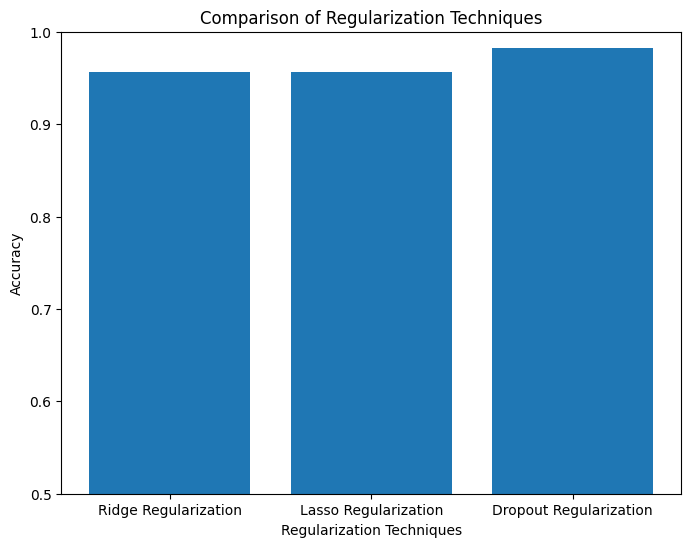

In [39]:
# Comparing the Results
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
dropout_accuracy = accuracy_score(y_test, y_pred_dropout)

print(f"Ridge Regularization Accuracy: {ridge_accuracy}")
print(f"Lasso Regularization Accuracy: {lasso_accuracy}")
print(f"Dropout Regularization Accuracy: {dropout_accuracy}")

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Ridge Regularization', 'Lasso Regularization', 'Dropout Regularization'], [ridge_accuracy, lasso_accuracy, dropout_accuracy])
plt.xlabel('Regularization Techniques')
plt.ylabel('Accuracy')
plt.title('Comparison of Regularization Techniques')

# Set the y-axis range from 0.5 to 1
plt.ylim(0.5, 1)
plt.show()

# Plot Confusion Matrices
Plot the confusion matrices for the models.

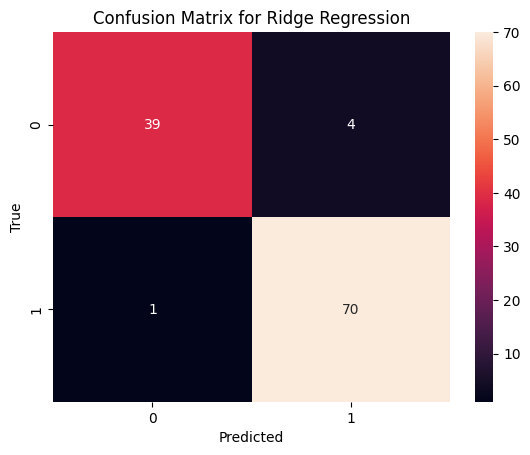

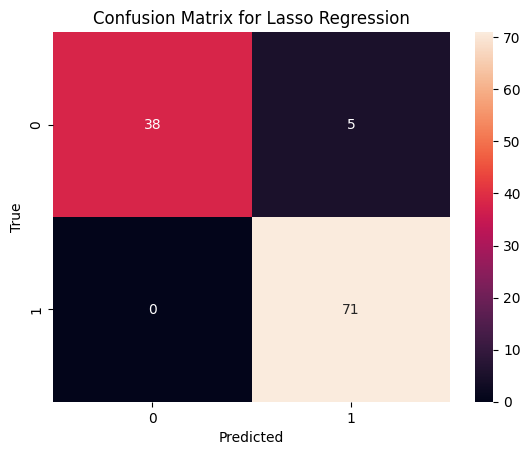

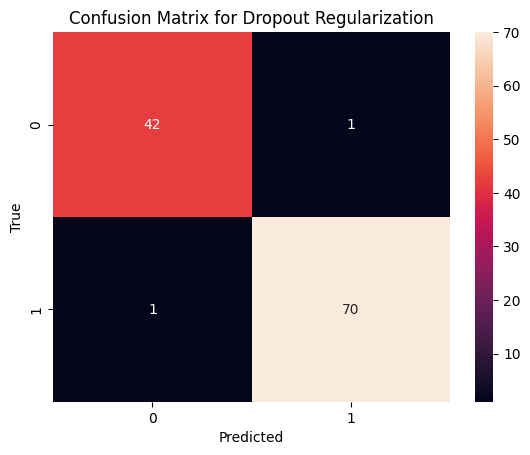

In [40]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for Ridge Regression
plot_confusion_matrix(y_test, y_pred_ridge, 'Ridge Regression')

# Plot confusion matrix for Lasso Regression
plot_confusion_matrix(y_test, y_pred_lasso, 'Lasso Regression')

# Plot confusion matrix for Dropout Regularization
plot_confusion_matrix(y_test, y_pred_dropout, 'Dropout Regularization')